# Quantifying the quality of clustering  via silhouette

LLevo mucho tiempo queriendo tener una herramienta para cuantificar la calidad de un clustering en base a las distancias inter/intra-clustering. Esto se consigue con el Silhouette score. Lo normal es usar su correspondiente plot, cosa que es muy util, pero mi intencion es tb solo poder trabajar con summaries de los scores. Ademas, tb mi intencion es que computacionalmente hablando sea mas amigable.

### Reference

- [Github - Book Sebastian Raschka -  python-machine-learning-book-2nd-edition](https://github.com/jmquintana79/python-machine-learning-book-2nd-edition/blob/master/code/ch11/ch11.py)

In [27]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import cm

## functions

In [44]:
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

## quantification of clustering quality via silhouette metric
def quantification_clustering_quality(X:np.array, y_km:np.array, verbose:bool = False)->np.array:
    """
    Quantification of clustering quality via silhouette metric.
    X -- Array of features used to estimate the clustering.
    y_km -- Labels returned by the clustering method to be evaluated.
    verbose -- Display or not extra information (default, False).
    return -- Array of statistics (mean, std) for each cluster and total.
    """
    # clusters labels
    cluster_labels = np.unique(y_km)
    # number of clusters
    n_clusters = cluster_labels.shape[0]
    # estimate silhouette values (for all records)
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    # initialize
    statistics = list()
    # loop of cluster labels
    for i, c in enumerate(cluster_labels):
        # collect silhouette values per cluster
        c_silhouette_vals = silhouette_vals[y_km == c]
        # estimate statistics for each cluster
        statistics.append([f"C{c}", np.mean(c_silhouette_vals), np.std(c_silhouette_vals)])
        # display
        if verbose:
            print(f"C{c}", np.mean(c_silhouette_vals), np.std(c_silhouette_vals))
    # final statistics
    statistics.append([f"ALL", np.mean(silhouette_vals), np.std(silhouette_vals)])
    # display
    if verbose:
        print(f"ALL", np.mean(silhouette_vals), np.std(silhouette_vals))
    # to df and return
    return statistics


## quantification of clustering quality via silhouette plot
def plot_quantification_clustering_quality(X:np.array, y_km:np.array):    
    """
    Quantification of clustering quality via silhouette analysis plot.
    X -- Array of features used to estimate the clustering.
    y_km -- Labels returned by the clustering method to be evaluated.
    """
    # labels of clusters
    cluster_labels = np.unique(y_km)
    # number of clusters
    n_clusters = cluster_labels.shape[0]
    # estimate silhouette values
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    # initialize
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    # loop of clusters
    for i, c in enumerate(cluster_labels):
        # silhouette values per cluster
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        # plot silhouette by cluster
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    # estimate final avg    
    silhouette_avg = np.mean(silhouette_vals)
    # plot final avg
    plt.axvline(silhouette_avg, color="red", linestyle="--") 
    # customize plot
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    # show
    plt.tight_layout()
    #plt.savefig('images/11_04.png', dpi=300)
    plt.show()

# Data sample cleation

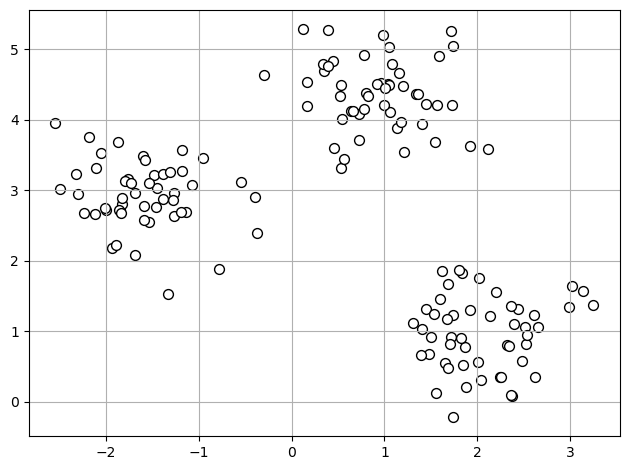

In [45]:
## data sample creation
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

## plot
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

# Quantifying the quality of clustering  via silhouette

In [46]:
## k-means clustering with 3 selected clusters
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)
## cluster cuantification
quant_cluster = quantification_clustering_quality(X, y_km)
quant_cluster

[['C0', 0.747155168519246, 0.06377415866783379],
 ['C1', 0.7106937869196279, 0.10791453717904566],
 ['C2', 0.6851764107477323, 0.10419696121973246],
 ['ALL', 0.7143417887288687, 0.09748562707571208]]

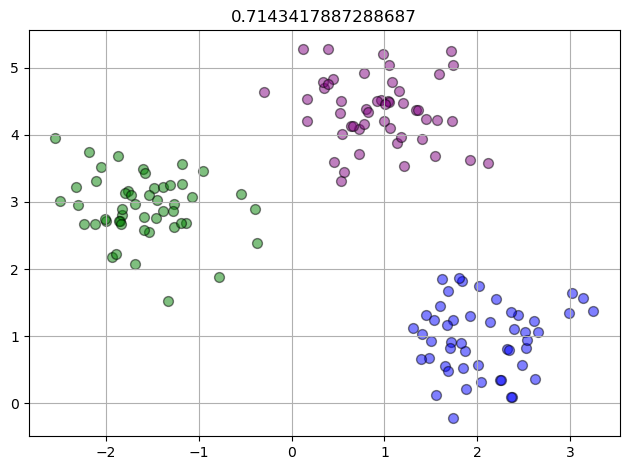

In [47]:
colors = ["blue", "green", "purple"]
for cluster in np.unique(y_km):
    i_cluster = np.where(y_km == cluster)[0]
    plt.scatter(X[i_cluster, 0], X[i_cluster, 1], 
                c=colors[cluster], marker='o', edgecolor='black', s=50, alpha=.5)    
plt.title(quant_cluster[-1][1])
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

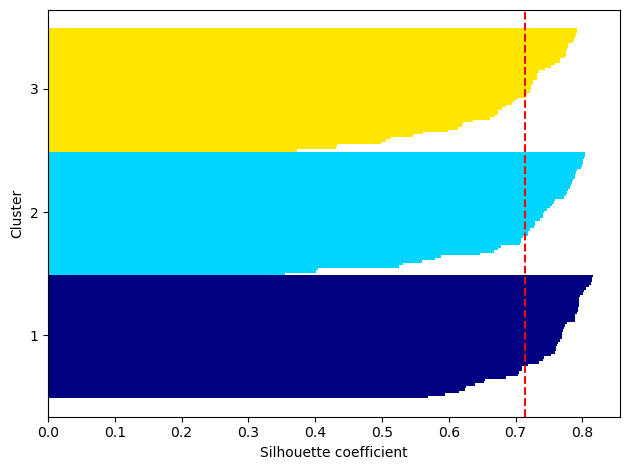

In [49]:
plot_quantification_clustering_quality(X, y_km)

# Comparison to "bad" clustering

In [50]:
## k-means clustering with 2 selected clusters
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)
## cluster cuantification
quant_cluster = quantification_clustering_quality(X, y_km)
quant_cluster

[['C0', 0.7674524392047153, 0.050657697164841205],
 ['C1', 0.4935797020354096, 0.10819837601158852],
 ['ALL', 0.5848706144251782, 0.1591479013736104]]

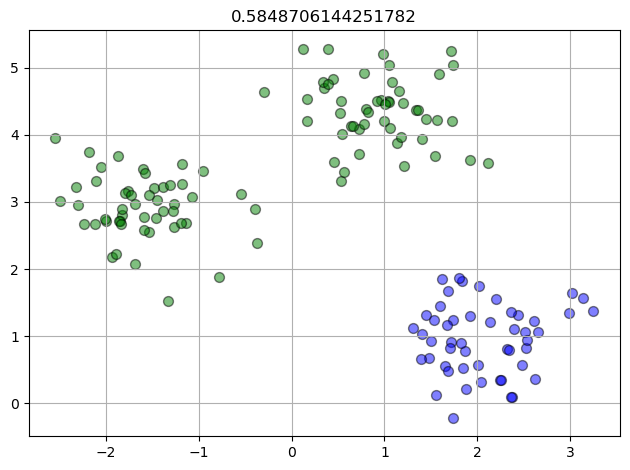

In [51]:
colors = ["blue", "green", "purple"]
for cluster in np.unique(y_km):
    i_cluster = np.where(y_km == cluster)[0]
    plt.scatter(X[i_cluster, 0], X[i_cluster, 1], 
                c=colors[cluster], marker='o', edgecolor='black', s=50, alpha=.5)    
plt.title(quant_cluster[-1][1])
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

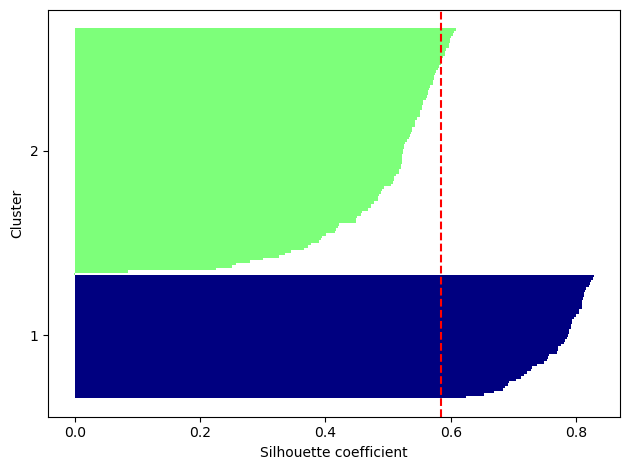

In [52]:
plot_quantification_clustering_quality(X, y_km)